In [1]:
import csv
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
with open('datasets\input.csv','r') as csvfile:
    reader = csv.reader(csvfile)
    X= [row for row in reader]
    
data = [[float(x)/100 for x in row] for row in X]
for row in data:
    row[5] /=10000000
    row[0] -= 20
    row[1] -= 20
    row[2] -= 20
    row[3] -= 20
    row[4] -= 20
X = np.array(data) * 3

# data = [[float(x) for x in row] for row in X]
# mean_X = np.mean(data, axis = 0)
# data -= mean_X
# for row in data:
#     row[5] /=10000000
# X = np.array(data) / 100
# print(mean_X)

print(X[0])
print(X.shape)

[4.81169679 5.08800294 4.81169679 4.90979736 4.90979736 8.74965   ]
(502, 6)


In [3]:
with open('datasets\output.csv','r', encoding='utf-8-sig') as csvfile:
    reader = csv.reader(csvfile)
    Y= [row for row in reader]
    
data = [[float(x)/100 -20 for x in row] for row in Y]
Y = np.array(data) * 3

# data = [[float(x) for x in row] for row in Y]
# mean_Y = np.mean(data, axis = 0)
# data -= mean_Y
# Y = np.array(data) / 100

print(Y[0])
print(Y.shape)

[4.84050294]
(502, 1)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [5]:
model = Sequential()
model.add(Dense(16, activation='tanh', input_shape = (6,), kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(32, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(32, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(16, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(8, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(1, activation='linear', kernel_initializer='random_uniform', bias_initializer='zeros'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                112       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 2,385
Trainable params: 2,385
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss = keras.losses.mean_squared_error,
            optimizer = keras.optimizers.Adadelta(),
            metrics = ["accuracy"])
hist = model.fit(X_train, y_train,
            batch_size = 128,
            epochs = 500,
            verbose = 1,
            validation_data = (X_test, y_test))
score = model.evaluate(X_test, y_test)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Train on 351 samples, validate on 151 samples
Epoch 1/500
351/351 [==============================] - 1s 2ms/step - loss: 310.2123 - acc: 0.0000e+00 - val_loss: 298.5650 - val_acc: 0.0000e+00
Epoch 2/500
351/351 [==============================] - 0s 34us/step - loss: 310.0130 - acc: 0.0000e+00 - val_loss: 298.2950 - val_acc: 0.0000e+00
Epoch 3/500
351/351 [==============================] - 0s 28us/step - loss: 309.5909 - acc: 0.0000e+00 - val_loss: 297.0649 - val_acc: 0.0000e+00
Epoch 4/500
351/351 [==============================] - 0s 30us/step - loss: 306.1570 - acc: 0.0000e+00 - val_loss: 282.9880 - val_acc: 0.0000e+00
Epoch 5/500
351/351 [==============================] - 0s 26us/step - loss: 284.8065 - acc: 0.0000e+00 - val_loss: 255.8985 - val_acc: 0.0000e+00
Epoch 6/500
351/351 [==============================] - 0s 33us/step - loss: 258.2591 - acc: 0.0000e+00 - val_loss: 233.3849 - val_acc: 0.0000e+00
Epoch 7/500
351/351 [==============================] - 0s 33us/step - loss: 235

351/351 [==============================] - 0s 26us/step - loss: 40.3818 - acc: 0.0000e+00 - val_loss: 49.1665 - val_acc: 0.0000e+00
Epoch 58/500
351/351 [==============================] - 0s 21us/step - loss: 40.3134 - acc: 0.0000e+00 - val_loss: 49.1601 - val_acc: 0.0000e+00
Epoch 59/500
351/351 [==============================] - 0s 16us/step - loss: 40.2613 - acc: 0.0000e+00 - val_loss: 49.1576 - val_acc: 0.0000e+00
Epoch 60/500
351/351 [==============================] - 0s 22us/step - loss: 40.2095 - acc: 0.0000e+00 - val_loss: 49.1579 - val_acc: 0.0000e+00
Epoch 61/500
351/351 [==============================] - 0s 22us/step - loss: 40.1583 - acc: 0.0000e+00 - val_loss: 49.1611 - val_acc: 0.0000e+00
Epoch 62/500
351/351 [==============================] - 0s 20us/step - loss: 40.1176 - acc: 0.0000e+00 - val_loss: 49.1661 - val_acc: 0.0000e+00
Epoch 63/500
351/351 [==============================] - 0s 18us/step - loss: 40.0790 - acc: 0.0000e+00 - val_loss: 49.1725 - val_acc: 0.0000e+0

351/351 [==============================] - 0s 23us/step - loss: 23.7185 - acc: 0.0000e+00 - val_loss: 25.4624 - val_acc: 0.0000e+00
Epoch 114/500
351/351 [==============================] - 0s 26us/step - loss: 23.2006 - acc: 0.0000e+00 - val_loss: 25.1614 - val_acc: 0.0000e+00
Epoch 115/500
351/351 [==============================] - 0s 20us/step - loss: 22.8261 - acc: 0.0000e+00 - val_loss: 24.4141 - val_acc: 0.0000e+00
Epoch 116/500
351/351 [==============================] - 0s 18us/step - loss: 22.4804 - acc: 0.0000e+00 - val_loss: 23.7288 - val_acc: 0.0000e+00
Epoch 117/500
351/351 [==============================] - 0s 30us/step - loss: 21.8671 - acc: 0.0000e+00 - val_loss: 23.4301 - val_acc: 0.0000e+00
Epoch 118/500
351/351 [==============================] - 0s 24us/step - loss: 21.8655 - acc: 0.0000e+00 - val_loss: 22.2375 - val_acc: 0.0000e+00
Epoch 119/500
351/351 [==============================] - 0s 22us/step - loss: 20.8231 - acc: 0.0000e+00 - val_loss: 21.3701 - val_acc: 0.0

351/351 [==============================] - 0s 24us/step - loss: 13.5166 - acc: 0.0000e+00 - val_loss: 20.9085 - val_acc: 0.0000e+00
Epoch 170/500
351/351 [==============================] - 0s 16us/step - loss: 17.9429 - acc: 0.0000e+00 - val_loss: 13.9223 - val_acc: 0.0000e+00
Epoch 171/500
351/351 [==============================] - 0s 20us/step - loss: 13.3797 - acc: 0.0000e+00 - val_loss: 16.4859 - val_acc: 0.0000e+00
Epoch 172/500
351/351 [==============================] - 0s 15us/step - loss: 15.6153 - acc: 0.0000e+00 - val_loss: 16.0014 - val_acc: 0.0000e+00
Epoch 173/500
351/351 [==============================] - 0s 22us/step - loss: 15.4718 - acc: 0.0000e+00 - val_loss: 19.0265 - val_acc: 0.0000e+00
Epoch 174/500
351/351 [==============================] - 0s 31us/step - loss: 17.6758 - acc: 0.0000e+00 - val_loss: 14.1857 - val_acc: 0.0000e+00
Epoch 175/500
351/351 [==============================] - 0s 27us/step - loss: 13.3504 - acc: 0.0000e+00 - val_loss: 14.4414 - val_acc: 0.0

351/351 [==============================] - 0s 31us/step - loss: 10.5441 - acc: 0.0000e+00 - val_loss: 21.0272 - val_acc: 0.0000e+00
Epoch 226/500
351/351 [==============================] - 0s 17us/step - loss: 12.9879 - acc: 0.0000e+00 - val_loss: 11.3241 - val_acc: 0.0000e+00
Epoch 227/500
351/351 [==============================] - 0s 26us/step - loss: 11.2927 - acc: 0.0000e+00 - val_loss: 21.4797 - val_acc: 0.0000e+00
Epoch 228/500
351/351 [==============================] - 0s 16us/step - loss: 13.2564 - acc: 0.0000e+00 - val_loss: 10.3986 - val_acc: 0.0000e+00
Epoch 229/500
351/351 [==============================] - 0s 20us/step - loss: 9.4543 - acc: 0.0000e+00 - val_loss: 12.0115 - val_acc: 0.0000e+00
Epoch 230/500
351/351 [==============================] - 0s 31us/step - loss: 15.2820 - acc: 0.0000e+00 - val_loss: 11.6905 - val_acc: 0.0000e+00
Epoch 231/500
351/351 [==============================] - 0s 20us/step - loss: 10.3193 - acc: 0.0000e+00 - val_loss: 11.5402 - val_acc: 0.00

351/351 [==============================] - 0s 24us/step - loss: 7.2623 - acc: 0.0000e+00 - val_loss: 7.5573 - val_acc: 0.0000e+00
Epoch 282/500
351/351 [==============================] - 0s 19us/step - loss: 7.3957 - acc: 0.0000e+00 - val_loss: 13.2666 - val_acc: 0.0000e+00
Epoch 283/500
351/351 [==============================] - 0s 35us/step - loss: 14.1458 - acc: 0.0000e+00 - val_loss: 8.2367 - val_acc: 0.0000e+00
Epoch 284/500
351/351 [==============================] - 0s 21us/step - loss: 7.1990 - acc: 0.0000e+00 - val_loss: 9.1882 - val_acc: 0.0000e+00
Epoch 285/500
351/351 [==============================] - 0s 25us/step - loss: 11.5829 - acc: 0.0000e+00 - val_loss: 9.0433 - val_acc: 0.0000e+00
Epoch 286/500
351/351 [==============================] - 0s 19us/step - loss: 8.3066 - acc: 0.0000e+00 - val_loss: 8.7814 - val_acc: 0.0000e+00
Epoch 287/500
351/351 [==============================] - 0s 21us/step - loss: 10.1371 - acc: 0.0000e+00 - val_loss: 11.1174 - val_acc: 0.0000e+00
E

Epoch 338/500
351/351 [==============================] - 0s 18us/step - loss: 7.6023 - acc: 0.0000e+00 - val_loss: 7.0321 - val_acc: 0.0000e+00
Epoch 339/500
351/351 [==============================] - 0s 21us/step - loss: 6.7273 - acc: 0.0000e+00 - val_loss: 12.3953 - val_acc: 0.0000e+00
Epoch 340/500
351/351 [==============================] - 0s 19us/step - loss: 9.3877 - acc: 0.0000e+00 - val_loss: 7.6191 - val_acc: 0.0000e+00
Epoch 341/500
351/351 [==============================] - 0s 17us/step - loss: 7.0683 - acc: 0.0000e+00 - val_loss: 13.5872 - val_acc: 0.0000e+00
Epoch 342/500
351/351 [==============================] - 0s 21us/step - loss: 8.0534 - acc: 0.0000e+00 - val_loss: 6.0617 - val_acc: 0.0000e+00
Epoch 343/500
351/351 [==============================] - 0s 24us/step - loss: 5.2973 - acc: 0.0000e+00 - val_loss: 6.5561 - val_acc: 0.0000e+00
Epoch 344/500
351/351 [==============================] - 0s 19us/step - loss: 7.1633 - acc: 0.0000e+00 - val_loss: 12.8136 - val_acc: 

Epoch 395/500
351/351 [==============================] - 0s 22us/step - loss: 9.0153 - acc: 0.0000e+00 - val_loss: 6.8739 - val_acc: 0.0000e+00
Epoch 396/500
351/351 [==============================] - 0s 21us/step - loss: 5.8268 - acc: 0.0000e+00 - val_loss: 6.4908 - val_acc: 0.0000e+00
Epoch 397/500
351/351 [==============================] - 0s 27us/step - loss: 6.8054 - acc: 0.0000e+00 - val_loss: 6.6136 - val_acc: 0.0000e+00
Epoch 398/500
351/351 [==============================] - 0s 18us/step - loss: 6.6239 - acc: 0.0000e+00 - val_loss: 10.5614 - val_acc: 0.0000e+00
Epoch 399/500
351/351 [==============================] - 0s 21us/step - loss: 8.9466 - acc: 0.0000e+00 - val_loss: 8.0345 - val_acc: 0.0000e+00
Epoch 400/500
351/351 [==============================] - 0s 18us/step - loss: 6.8785 - acc: 0.0000e+00 - val_loss: 8.4196 - val_acc: 0.0000e+00
Epoch 401/500
351/351 [==============================] - 0s 22us/step - loss: 8.5844 - acc: 0.0000e+00 - val_loss: 6.2942 - val_acc: 0.

Epoch 452/500
351/351 [==============================] - 0s 20us/step - loss: 9.4985 - acc: 0.0000e+00 - val_loss: 4.6331 - val_acc: 0.0000e+00
Epoch 453/500
351/351 [==============================] - 0s 27us/step - loss: 4.8035 - acc: 0.0000e+00 - val_loss: 8.6753 - val_acc: 0.0000e+00
Epoch 454/500
351/351 [==============================] - 0s 17us/step - loss: 8.2658 - acc: 0.0000e+00 - val_loss: 4.5990 - val_acc: 0.0000e+00
Epoch 455/500
351/351 [==============================] - 0s 21us/step - loss: 4.8602 - acc: 0.0000e+00 - val_loss: 6.6527 - val_acc: 0.0000e+00
Epoch 456/500
351/351 [==============================] - 0s 26us/step - loss: 5.6710 - acc: 0.0000e+00 - val_loss: 8.8563 - val_acc: 0.0000e+00
Epoch 457/500
351/351 [==============================] - 0s 20us/step - loss: 7.7185 - acc: 0.0000e+00 - val_loss: 7.2955 - val_acc: 0.0000e+00
Epoch 458/500
351/351 [==============================] - 0s 19us/step - loss: 6.1792 - acc: 0.0000e+00 - val_loss: 7.2971 - val_acc: 0.0

In [14]:
y_test_predict = model.predict(X[::2])
# print(X[::5])

In [15]:
# print(Y[::5])

In [16]:
# print(y_test_predict)
# print(y_test_predict.shape)

In [18]:
y_true_test = (Y[::2] / 3 + 20) * 100
# print(y_true_test)

In [19]:
y_true_test_predict = (y_test_predict / 3 + 20) * 100
# print(y_true_test_predict)

In [20]:
x_coor_len = len(y_true_test_predict)
x_coor_len
x_coor = range(x_coor_len)

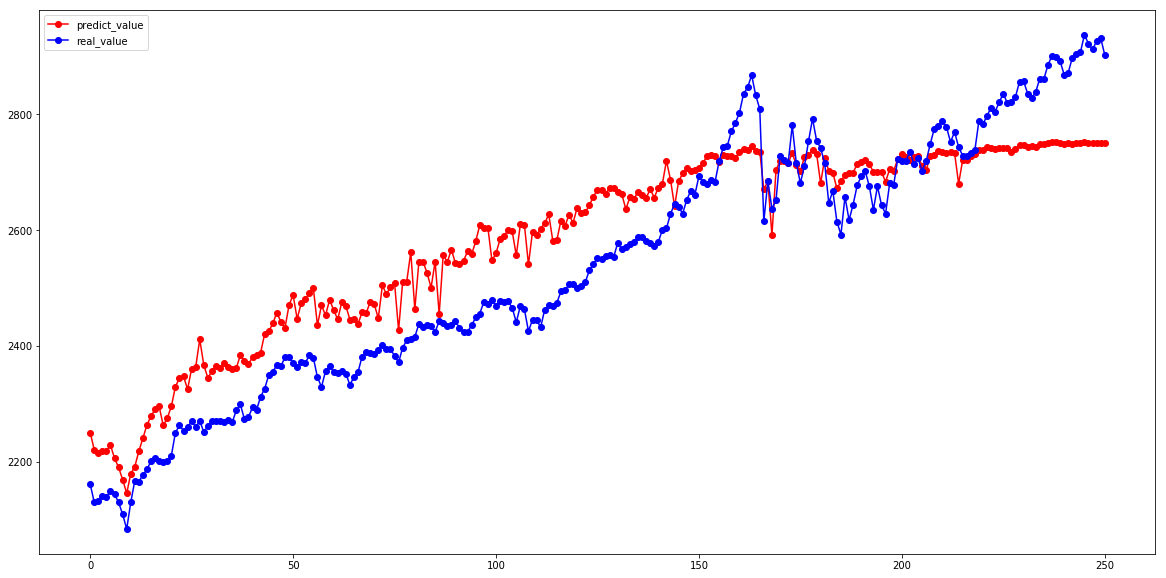

In [21]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.plot(x_coor, y_true_test_predict, 'ro-', label='predict_value')
plt.plot(x_coor, y_true_test, 'bo-', label = 'real_value')
plt.legend()